In [5]:
import matplotlib
%matplotlib inline
from matplotlib.colors import LogNorm
import yt

In [6]:
from SZmaps.IO import get_fits_data as gf
reload(gf)
yt_datastruct = gf.create_yt_datastruc_from_cubes('/home/babyostrich/data/L500_fits/','1.0005',1, 6)
dd = yt_datastruct.all_data()

yt : [INFO     ] 2017-07-11 09:57:21,733 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-07-11 09:57:21,734 Parameters: domain_dimensions         = [ 256.  256.  256.]
yt : [INFO     ] 2017-07-11 09:57:21,735 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-11 09:57:21,737 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-07-11 09:57:21,738 Parameters: cosmological_simulation   = 0.0


in units of omM


In [7]:
from astropy.io.fits import getdata
import yt.utilities.cosmology as cosmology

Lv5rhogas = getdata('/home/babyostrich/data/L500_fits/rhogas_a1.0005_CL2_N256_Lv5.fits')
Lv6rhogas = getdata('/home/babyostrich/data/L500_fits/rhogas_a1.0005_CL2_N256_Lv6.fits')
Lv5T = getdata('/home/babyostrich/data/L500_fits/temperature_a1.0005_CL2_N256_Lv5.fits')

Lv6T = getdata('/home/babyostrich/data/L500_fits/temperature_a1.0005_CL2_N256_Lv6.fits')


2.18121554358e-32 8673.53387451


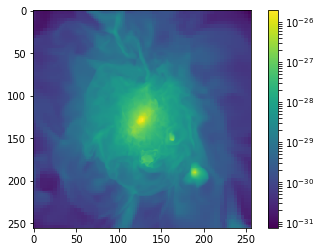

In [8]:
import matplotlib.pyplot as plt
plt.imshow(Lv5rhogas[:,:,128],norm=LogNorm())
plt.colorbar()
print Lv5rhogas.min(), Lv6rhogas.max()

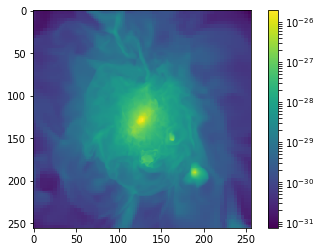

In [9]:
import matplotlib.pyplot as plt
plt.imshow(Lv5rhogas[:,:,128],norm=LogNorm())
plt.colorbar()

yt : [INFO     ] 2017-07-11 09:57:23,841 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-07-11 09:57:23,842 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-07-11 09:57:23,844 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-07-11 09:57:23,845 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-07-11 09:57:23,847 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2017-07-11 09:57:23,915 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2017-07-11 09:57:23,935 Making a fixed resolution buffer of (('gas', 'szy')) 800 by 800
yt : [INFO     ] 2017-07-11 09:57:24,589 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2017-07-11 09:57:24,605 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2017-07-11 09:57:24,619 Making a fixed resolution buffer of (('gas', 'szy')) 800 by 800


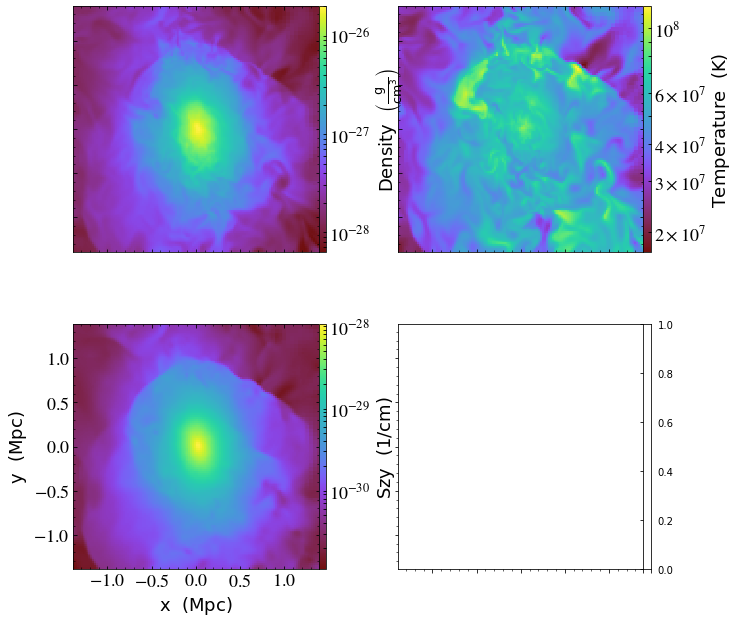

In [10]:
# Test datastructure: multi-plot projection of T, rho, SZ, and velocity
# http://yt-project.org/doc/cookbook/complex_plots.html
import yt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure()

grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (2, 2),
                axes_pad = 1.0,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

fields = ['density', 'temperature', 'szy']

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = yt.SlicePlot(yt_datastruct, 'z', fields)

p.zoom(2)

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

In [11]:
# Test reading in database, using database to delineate the r500c, r200m borders
import SZmaps.IO.database as db
from yt.units import kpc
halo_ids = db.sim.get_halo_ids()
halo_props = db.collect_halo_props(halo_ids)
r200m = halo_props['r200m'][0] 
r500c = halo_props['r500c'][0] 

looking in /home/babyostrich/data/databases/ for L500_NR_0.db


Annotate projections, and calculate integrated quantities in sphere and cylinder along all lines of sight.

yt : [INFO     ] 2017-07-11 09:57:28,223 Projection completed
yt : [INFO     ] 2017-07-11 09:57:28,224 xlim = 0.185344 0.814656
yt : [INFO     ] 2017-07-11 09:57:28,225 ylim = 0.185344 0.814656
yt : [INFO     ] 2017-07-11 09:57:28,227 xlim = 0.185344 0.814656
yt : [INFO     ] 2017-07-11 09:57:28,228 ylim = 0.185344 0.814656
yt : [INFO     ] 2017-07-11 09:57:28,230 Making a fixed resolution buffer of (('gas', 'szy')) 800 by 800



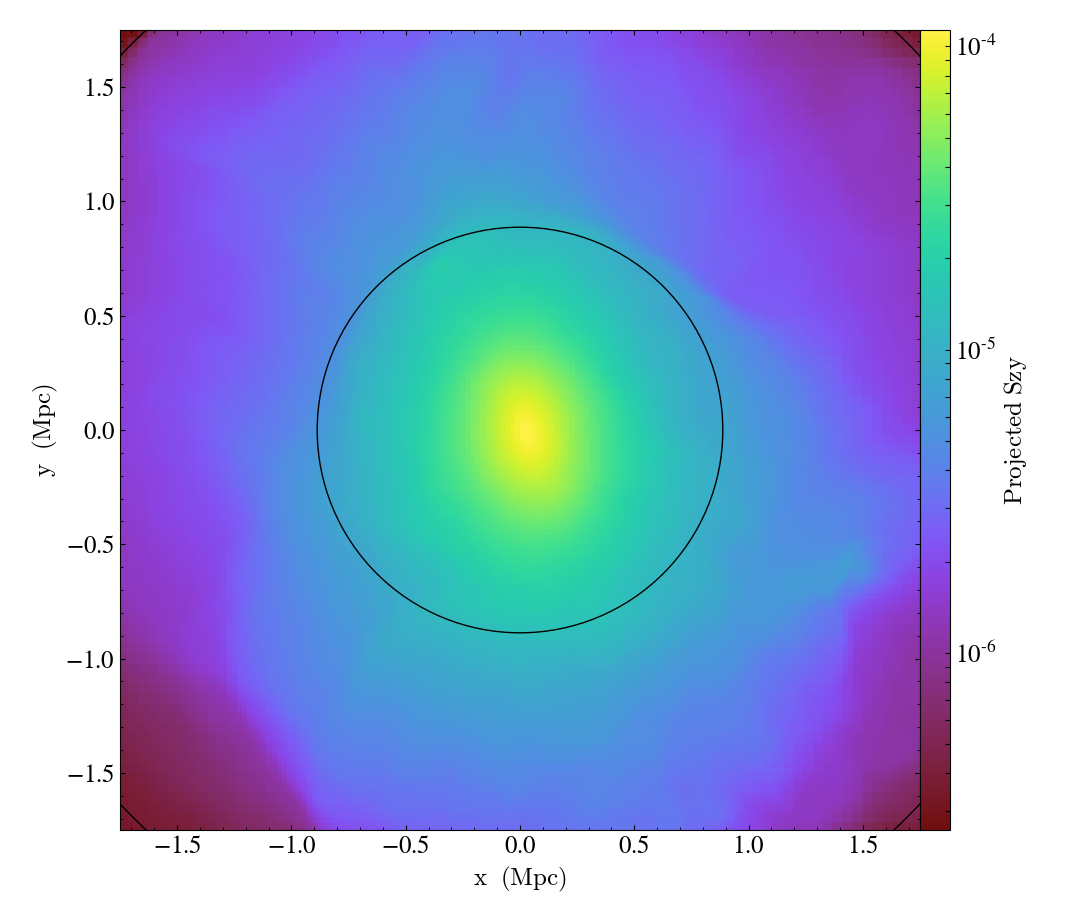

In [12]:
from yt.units import Mpc
axis = 2
p = yt.ProjectionPlot(yt_datastruct, axis, 'szy', width=3.5*Mpc)
p.annotate_sphere([0.5, 0.5, 0.5], radius=(r500c, 'kpc'),
                  circle_args={'color':'black'})
p.annotate_sphere([0.5, 0.5, 0.5], radius=(r200m, 'kpc'),
                  circle_args={'color':'black'})

Let's calculate the angular diameter distance for a cluster that sits at observational redshift of zf = 0.02.

In [13]:
from yt.utilities.cosmology import Cosmology
cosmo = Cosmology()
(zi, zf) = (0,0.02)
dA = cosmo.angular_diameter_distance(zi,zf).in_units('Mpc')
cosmo.omega_matter

0.27

Next, let's integrate in a sphere and in a cylinder, plot in each direction, and plot.
Sphere: http://yt-project.org/doc/reference/api/generated/yt.data_objects.selection_data_containers.YTSphere.html#yt.data_objects.selection_data_containers.YTSphere


In [14]:
sphere = yt_datastruct.sphere([0.5,0.5,0.5],(r500c,'kpc'))
print sphere.volume().in_units('Mpc**3') * sphere['szy'].sum().in_units('1/Mpc') / dA**2 
print sphere.volume().in_units('Mpc**3') * sphere['szy'].sum().in_units('1/Mpc')
print sphere.volume().in_units('kpc**3') / sphere['szy'].size
print sphere['szy'].sum().in_units('1/Mpc')
print dA
print (sphere['szy'].sum().in_units('1/Mpc') *( 3.6 * 4/0.7 )**3 * kpc**3 ).in_units('Mpc**2')

0.00193156643781 dimensionless
13.1299645466 Mpc**2
10253.8727297 kpc**3
4.49067259855 1/Mpc
82.4473974888 Mpc
3.90935175758e-05 Mpc**2


Cylinder: http://yt-project.org/doc/reference/api/generated/yt.data_objects.selection_data_containers.YTDisk.html#yt.data_objects.selection_data_containers.YTDisk

In [15]:
center = [0.5]*3
normal = [1,0,0]
radius = r500c
depth = 3.*r500c
cylinder = yt_datastruct.disk(center, normal, (radius,'kpc'), (depth, 'kpc'))
cylinder.volume().in_units('Mpc**3') / cylinder['szy'].size * cylinder['szy'].sum().in_units('1/Mpc') 

5.71473485538e-05 Mpc**2

To do:

(1)  Script up the loading and sphere calculation of a halo.  Done. 

(2)  Integrate the r500c quantity in determining the sphere's extent. Done.

(3)  Make a Ysz vs. mass plot. Done.

(4)  Do (1)-(3) for a cylinder. Done.

(5)  Do the same thing for outskirt annuli or outskirt shells - this should basically just pick up the scatter from the Ysz vs. mass scaling.

In [16]:
import pandas as pd
szy_df = pd.read_csv('/home/babyostrich/Repos/SZmaps/calculate_scaling/szyscaling.csv',sep=' ')

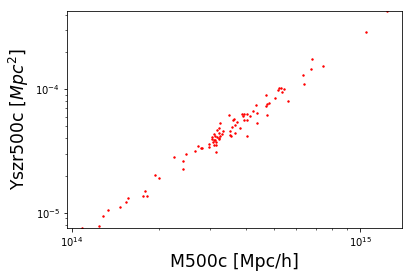

In [17]:
# Scatter plot of spherically integrated Ysz
plt.scatter(szy_df['M500c'],szy_df['Yszr500c'],s=2.,c='r')
plt.xscale('log')
plt.yscale('log')
plt.ylim((szy_df['Yszr500c'].min(),szy_df['Yszr500c'].max()) )
plt.ylabel('Yszr500c [$Mpc^2$]',fontsize='xx-large')
plt.xlabel('M500c [Mpc/h]',fontsize='xx-large')

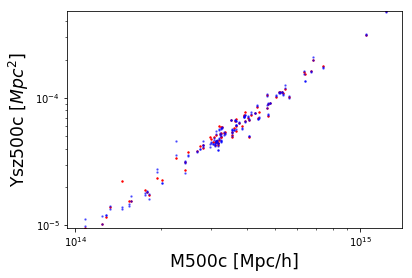

In [18]:
# Scatter plot of cylindrically integrated Ysz
plt.scatter(szy_df['M500c'],szy_df['Yszcyl_x_r500c'],s=2.,c='r')
plt.scatter(szy_df['M500c'],szy_df['Yszcyl_y_r500c'],s=2.,c='b',alpha=0.5)
plt.scatter(szy_df['M500c'],szy_df['Yszcyl_z_r500c'],s=2.,c='b',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim((szy_df['Yszcyl_x_r500c'].min(),szy_df['Yszcyl_x_r500c'].max()) )
plt.ylabel('Ysz500c [$Mpc^2$]',fontsize='xx-large')
plt.xlabel('M500c [Mpc/h]',fontsize='xx-large')

In the next steps, I'll look at the integrated szy between r500c and r200c (and r200m), and how that compares with the values at z=1.  

In [19]:
szy_z0 = pd.read_csv('/home/babyostrich/Repos/SZmaps/calculate_scaling/szyscaling_a1.0005.csv',sep=' ')
szy_z1 = pd.read_csv('/home/babyostrich/Repos/SZmaps/calculate_scaling/szyscaling_a0.5014.csv',sep=' ')
szy_df = pd.read_csv('/home/babyostrich/Repos/SZmaps/calculate_scaling/szyscaling_a1.0005_Lv6.csv',sep=' ')


In [20]:
def plot_Ym_scatter( dataframes, 
                    rtype='500c', region='Yszr',
                        annotate_fit=True) :
    for i, dataframe in enumerate(dataframes) :
        plt.scatter(dataframe['M'+rtype],dataframe[region+rtype],s=2.)
        if annotate_fit: 
            fit_scatter_output, sigma = fit_scatter(dataframe, rtype=rtype, region=region)
            import numpy as np
            plt.plot( dataframe['M'+rtype], 
                      np.exp(scaling_relation(dataframe['M'+rtype], *fit_scatter_output)),
                      ls='--',lw=.3,c='k',alpha=0.5)
            
            text_loc = (.15, .8 - i*.1) 
            plt.figtext(text_loc[0], text_loc[1],
                        'ln$A_{14}$=%f, $\\alpha$=%f, $\\sigma=(%f,%f)$' % (fit_scatter_output[0],fit_scatter_output[1], sigma[0],sigma[1]), 
                    fontsize='x-large')

    plt.xscale('log')
    plt.yscale('log')
    #plt.ylim((dataframe[region+rtype].min(),dataframe[region+rtype].max()) )
    plt.ylabel('Y$_{\\rm{sz},'+rtype+'}$ [Mpc$^2$]',fontsize='xx-large')
    plt.xlabel('M$_{\\rm{'+rtype+'}}$ [Mpc/h]',fontsize='xx-large')


In [55]:
def Ez(redshift) :
    import numpy as np
    return np.sqrt(0.3*(1+redshift)**3+0.7)

def scaling_relation(M, lnA14, alpha) :
    import numpy as np
    from astropy.cosmology import FlatLambdaCDM
    flatcosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    #  Need to check if Ez is used when fitting.
    if M.min() < 8e13 : # z=1
        if M.max() > 5.7e14 : # M200m
            return lnA14 + alpha * np.log(M/1e14)+np.log( 2.**2)
        else :
            return lnA14 + alpha * np.log(M/1e14)+np.log( Ez(1.)**(2./3.) )
    else :
        return lnA14 + alpha * np.log(M/1e14)+np.log( Ez(0.)**(2./3.) )
    
def fit_scatter(dataframe, rtype='500c', region='Yszr') :
    from scipy.optimize import curve_fit
    import numpy as np
    xdata = dataframe['M'+rtype].values
    ydata = np.log(np.array(dataframe[region+rtype].values))
    curve_fit_output, pcov = curve_fit(scaling_relation, xdata, ydata )
    return curve_fit_output, np.sqrt(np.diag(pcov))

First, the scatterplots of Y-M500c, Y-M200c, and Y-M200m at z=0 and z=1 in spheres and cylinders

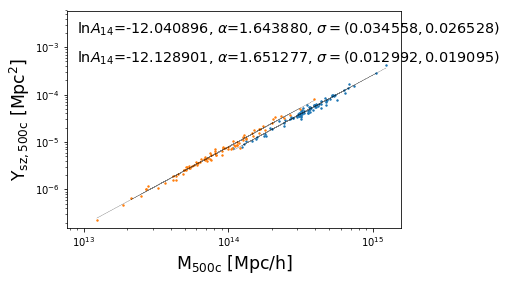

In [56]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='500c')

Compare with the z=0 Ysz(r500c) data from Lv6.  Close enough....

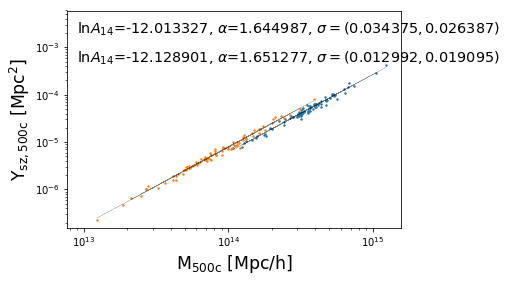

In [23]:
plot_Ym_scatter([szy_df, szy_z1])

Here are the r200c and r200m scalings at z=1, and z=0.

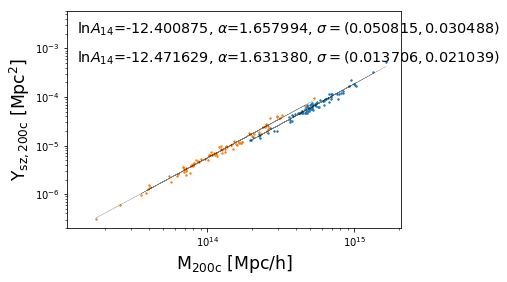

In [57]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200c')

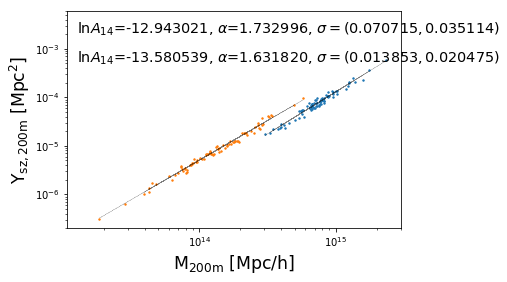

In [58]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200m')

The plot below has best fit parameters that are a bit different from the ones found in Yu+15 ( lnA14, alpha = -12.11, 1.56 ).  I should check the output of Lv6 to see if this is a resolution dependent effect.

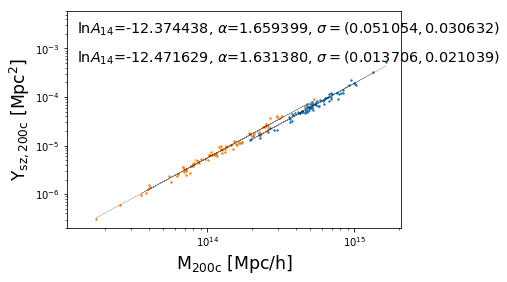

In [25]:
plot_Ym_scatter([szy_df,szy_z1], rtype='200c')

5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14
5.3201e+14


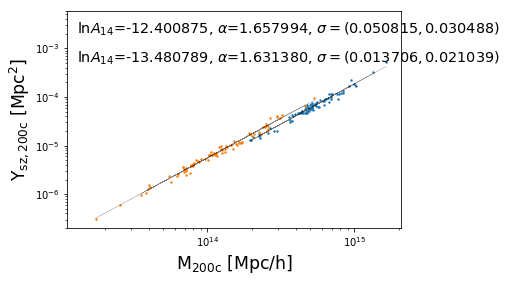

In [54]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200c')

5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14
5.7568e+14


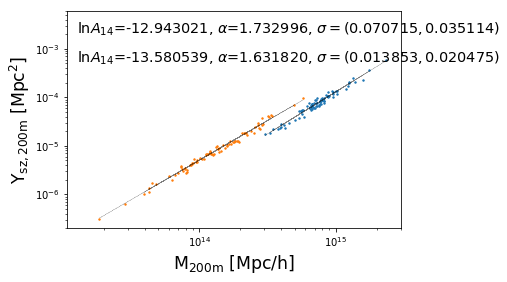

In [53]:
plot_Ym_scatter([szy_z0, szy_z1], rtype='200m')

Now to look at the best-fit values for cylindrical projections

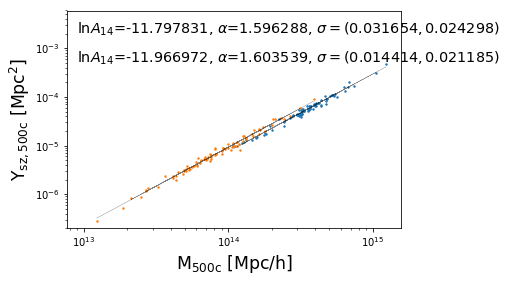

In [28]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='500c',region='Yszcyl_z_r')

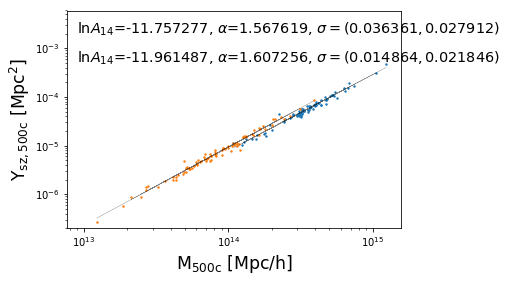

In [29]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='500c',region='Yszcyl_y_r')

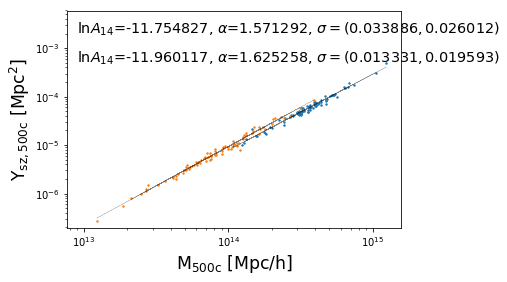

In [30]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='500c',region='Yszcyl_x_r')

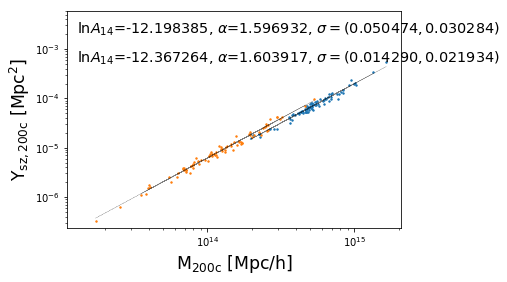

In [31]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200c',region='Yszcyl_z_r')

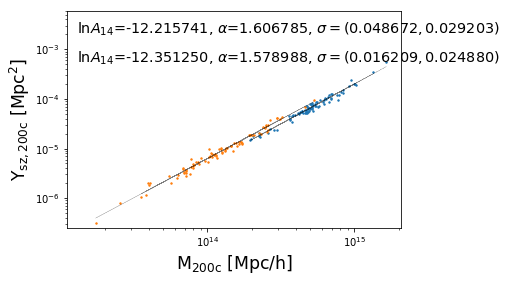

In [32]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200c',region='Yszcyl_y_r')

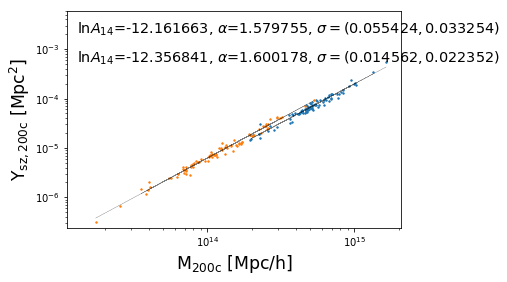

In [33]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200c',region='Yszcyl_x_r')

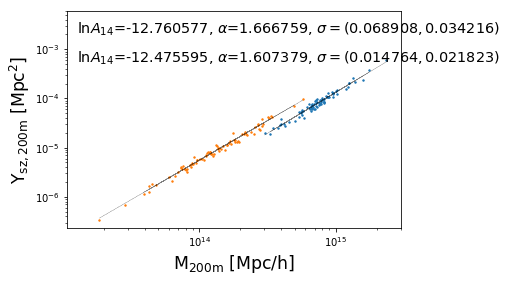

In [34]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200m',region='Yszcyl_z_r')

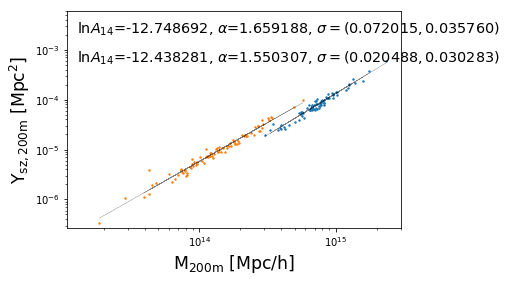

In [35]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200m',region='Yszcyl_y_r')

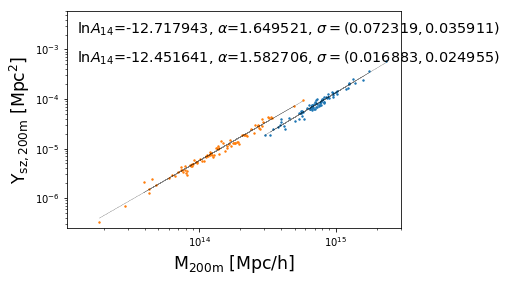

In [36]:
plot_Ym_scatter([szy_z0,szy_z1], rtype='200m',region='Yszcyl_x_r')

In the next step, we will see how well we can "scale out" the mass, then redshift dependence.  We do this by dividing all values by the best-fit Y-M scaling at z=0, $Y_{\rm{fit}} = A_{14}M^{\alpha}_{14}E(z)^{2/3}$  

In [37]:
def calc_scaled_Y(dataframe, rtype='500c', region='Yszr', mass_rtype='500c',
                 fit_scatter_output=None, scale_by_z_dep=None) :
    '''Returns the scaled Y, scaled by a chosen mass scaling,
    and best fit parameters given by fit_scatter_output, and optionally 
    scaled by redshift dependence.'''
    import numpy as np
    lnA14, alpha = fit_scatter_output
    
    Y = dataframe[region+rtype]
    Yfit = np.exp(lnA14) * (dataframe['M'+mass_rtype] / 1e14) ** alpha 
    if scale_by_z_dep != None : 
        print "scaling out a redshift dependence"
        Yfit /= scale_by_z_dep
    
    return Y / Yfit
    


In [38]:
def plot_YM_scaled(dataframe, rtype='500c',region='Yszr', mass_rtype=None,
                   fit_scatter_output=None, scale_by_z_dep=None, **plot_kwargs) :
    if mass_rtype==None : mass_rtype=rtype
    scaledY = calc_scaled_Y(dataframe, rtype=rtype, region=region,
                            mass_rtype=mass_rtype, 
                            fit_scatter_output=fit_scatter_output,
                             scale_by_z_dep=scale_by_z_dep)
    plt.plot([dataframe['M'+rtype].min(),dataframe['M'+rtype].max()],[scaledY.mean(),scaledY.mean()])            
        
    plt.scatter(dataframe['M'+rtype], scaledY, **plot_kwargs)
    plt.xscale('log')
    plt.ylabel('Y$_{\\rm{sz},'+rtype+'}$/Y$_{\\rm{fit}}$',fontsize='xx-large')
    plt.xlabel('M$_{\\rm{'+rtype+'}}$ [Mpc/h]',fontsize='xx-large')

scaling out a redshift dependence


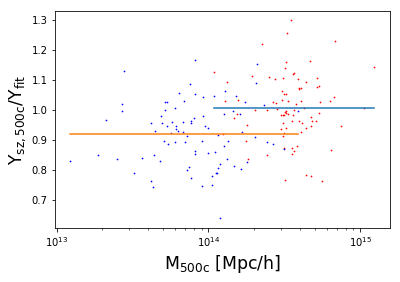

In [40]:
# Scaling out the mass dependence according to the best fit lnA14 and alpha
plot_YM_scaled(szy_z0, fit_scatter_output=fit_scatter(szy_z0)[0], 
               s=0.5,c='r')
plot_YM_scaled(szy_z1, fit_scatter_output=fit_scatter(szy_z0)[0], scale_by_z_dep=Ez(1.)**(-2./3),
               s=0.5,c='b')

Let's see how well the r200c best fit values at z=0 scale out the redshift dependence.

scaling out a redshift dependence


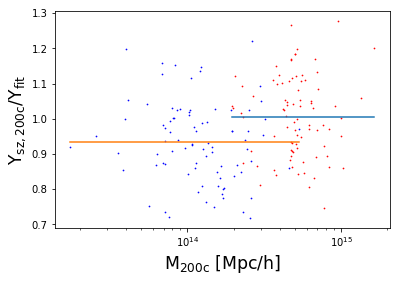

In [41]:
# Scaling out the mass dependence according to the best fit lnA14 and alpha
rtype = '200c'
plot_YM_scaled(szy_z0, rtype=rtype, 
               fit_scatter_output=fit_scatter(szy_z0,rtype=rtype)[0], 
               s=0.5,c='r')
plot_YM_scaled(szy_z1, rtype=rtype, 
               fit_scatter_output=fit_scatter(szy_z0,rtype=rtype)[0], scale_by_z_dep=Ez(1.)**(-2./3),
               s=0.5,c='b')

scaling out a redshift dependence


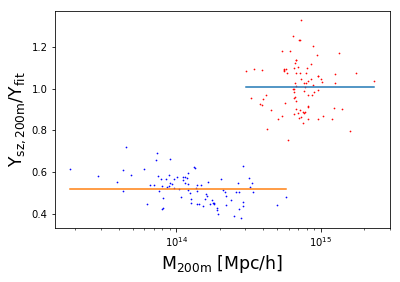

In [47]:
# Scaling out the mass dependence according to the best fit lnA14 and alpha
rtype='200m'
plot_YM_scaled(szy_z0,rtype=rtype,
               fit_scatter_output=fit_scatter(szy_z0,rtype=rtype)[0], 
               s=0.5,c='r')
plot_YM_scaled(szy_z1, rtype=rtype,
               fit_scatter_output=fit_scatter(szy_z0,rtype=rtype)[0], scale_by_z_dep=(1.+1.)**(-2),#Ez(1.)**(-2./3),
               s=0.5,c='b')


Let's look at the evolution in cylinders

In [ ]:
# Scaling out the mass dependence according to the best fit lnA14 and alpha
rtype, region ='200c', 'Yszcyl_z_r'
plot_YM_scaled(szy_z0,rtype=rtype,region=region,
               fit_scatter_output=fit_scatter(szy_z0,
                                              rtype=rtype,region=region),
               s=0.5,c='r')
plot_YM_scaled(szy_z1, rtype=rtype, region=region,
               fit_scatter_output=fit_scatter(szy_z0,
                                              rtype=rtype,region=region), scale_by_z_dep=Ez(1.)**(-2./3),
               s=0.5,c='b')


In [ ]:
# Scaling out the mass dependence according to the best fit lnA14 and alpha
rtype, region ='200c', 'Yszcyl_y_r'
plot_YM_scaled(szy_z0,rtype=rtype,region=region,
            fit_scatter_output=fit_scatter(szy_z0,
                                           rtype=rtype,region=region),
            s=0.5,c='r')
plot_YM_scaled(szy_z1, rtype=rtype, region=region,
               fit_scatter_output=fit_scatter(szy_z0,
                                              rtype=rtype,region=region), scale_by_z_dep=Ez(1.)**(-2./3),
               s=0.5,c='b')


In [ ]:
# Scaling out the mass dependence according to the best fit lnA14 and alpha
rtype, region ='200m', 'Yszcyl_x_r'
plot_YM_scaled(szy_z0,rtype=rtype,region=region,               
               fit_scatter_output=fit_scatter(szy_z0,
                                              rtype=rtype,region=region),
               s=0.5,c='r')
plot_YM_scaled(szy_z1, rtype=rtype, region=region,
               fit_scatter_output=fit_scatter(szy_z0,
                                              rtype=rtype,region=region), scale_by_z_dep=Ez(1.)**(-2./3),
               s=0.5,c='b')


Now, we plot the average blue and the average red with errorbars of the stdev.

In [ ]:
def calc_avg_scaled_Y(dataframe, rtype='500c',region='Yszr', mass_rtype=None,
                   fit_scatter_output=None, scale_by_z_dep=None) :
    if mass_rtype==None : mass_rtype=rtype
    scaledY = calc_scaled_Y(dataframe, rtype=rtype, region=region,
                            mass_rtype=mass_rtype, 
                            fit_scatter_output=fit_scatter_output,
                             scale_by_z_dep=scale_by_z_dep)
    return scaledY.mean(), scaledY.std()

In [ ]:
def plot_Y_Yfit_ratio(region='Yszr',rtypes=['500c','200c','200m']) :
    for i, rtype in enumerate(rtypes) :
        for df, redshift, scale_by_z_dep, color in zip([szy_z0, szy_z1],['0','1'],[None, Ez(1.)**(-2./3)],['purple','green']) :
            Ymean, Yerr = calc_avg_scaled_Y(df, rtype=rtype, region=region,
                                  fit_scatter_output=fit_scatter(szy_z0,rtype=rtype,region=region),
                                            scale_by_z_dep=scale_by_z_dep)
            print 'z='+redshift+'at r'+rtype+'(Yavg,std)=', (Ymean,Yerr)
            if i == 0 : label='z='+redshift
            else: label=None
            plt.errorbar([i], Ymean, yerr=Yerr,capsize=5.,marker='s',c=color,label=label)
    plt.ylabel('Y/Y$_{\\rm{fit}}$',fontsize='xx-large')
    plt.xticks([0,1,2],rtypes,fontsize='large',rotation=45)
    plt.legend(numpoints=1,frameon=False)

In [ ]:
plot_Y_Yfit_ratio()

In [ ]:
plot_Y_Yfit_ratio(region='Yszcyl_z_r')

To do: Here, we plot the scaled scatter of the Ysz value between $r500c<R< r200c$, then $r500c<R<r200m$.